# Analyze the Ridge Regression results with summed spikes
design matrix is made out of summed spikes.

In [1]:
from pathlib import Path
import os
wd=Path().absolute().parent
os.chdir(wd) #change the working dirctory to parant

In [2]:
from modules.func import *
import matplotlib.pyplot as plt
import numpy as np
# from modules.encoder import l
import pickle
from pathlib import Path
from tqdm import tqdm   

all_data_dir=Path('./data/alldata/')
datalist=[x for x in all_data_dir.iterdir()]
output_dir=Path("output/data/ridge_regression/")

# Basic Info

In [86]:
data_name=str(datalist[1]).split('/')[-1]
sample_type = "knockout" if "CaMKII" in data_name else "wild-type"

with open(output_dir/Path(f"rr_summed_spikes_{data_name}.pickle"),"rb") as f:
    results_all=pickle.load(f) 

df=pd.DataFrame({
    "overall sig":[result['model_smry']["overall sig"][0][0] for result in results_all],
    "individual sig":[np.sum(np.array(result['model_smry']["individual sig"]).ravel()<.95) for result in results_all],
    "penalty": [result['penalty'] for result in results_all],
    "nthist": [result['nthist'] for result in results_all],
    "fitting error": [result['model_smry']['fitted error']/25 for result in results_all],
    "predicting error": [cal_mse(result['model_smry']["prediction"],result["y_test"])/25 for result in results_all],

})
df

,overall sig,individual sig,penalty,nthist,fitting error,predicting error
0,1.0,0,8,0,172.236153,164.596242
1,1.0,0,16,0,172.247696,164.455213
2,1.0,0,32,0,172.293238,164.198296
3,1.0,0,64,0,172.470509,163.781164
4,1.0,0,128,0,173.142521,163.304770
...,...,...,...,...,...,...
319,1.0,25,65536,48,347.419455,585.007245
320,1.0,30,131072,48,434.738417,662.587161
321,1.0,48,262144,48,511.679210,723.330028
322,1.0,55,524288,48,565.642314,763.222268


# Visalization for two sample mice

## A knockout mouse result

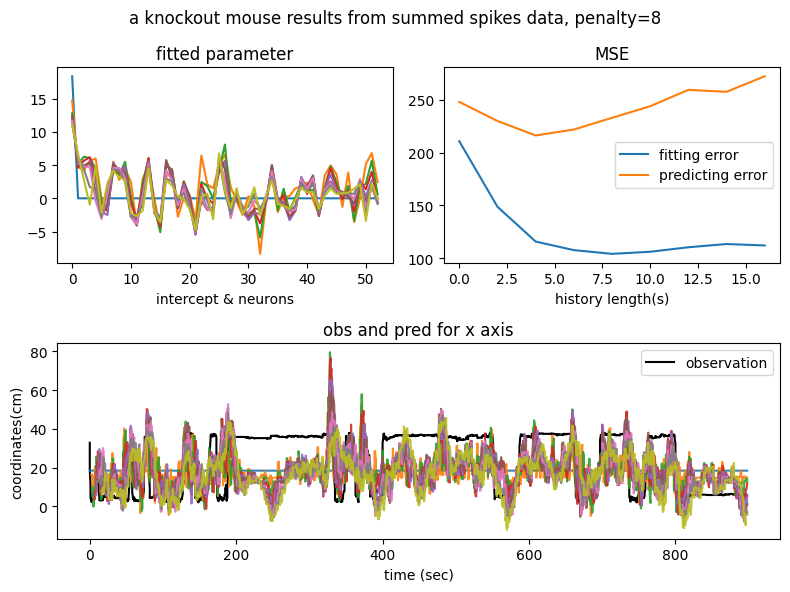

In [11]:
data_name=str(datalist[0]).split('/')[-1]
sample_type = "knockout" if "CaMKII" in data_name else "wild-type"

with open(output_dir/Path(f"rr_summed_spikes_{data_name}.pickle"),"rb") as f:
    results_all=pickle.load(f) 

plt.figure(figsize=(8,6))
fit_error=[]
pred_error=[]
nthist_list=[]
for result in results_all:
    if result["penalty"]==8 and result["coord_axis"]=="x-axis":
        fit_error.append((result["model_smry"]["fitted error"])/25) # the model result didnt divide the coordnates data by 5
        pred_error.append(cal_mse(result['model_smry']["prediction"],result["y_test"])/25)
        nthist_list.append(result["nthist"]/3)

        plt.subplot(221)
        plt.plot(result["model_smry"]["fitted parameter"]/5)
        plt.xlabel("intercept & neurons")
        plt.title("fitted parameter")

        test_length=len(result["y_test"])
        xx=[int(i/3) for i in range(result["nthist"],result["nthist"]+test_length)]
        if result["nthist"]==0:
            plt.subplot(212)
            plt.plot(xx,result["y_test"]/5,c="black",label="observation") # 200->40
            plt.legend()
            plt.title("obs and pred for x axis")
            plt.xlabel("time (sec)")
            plt.ylabel("coordinates(cm)")
        plt.subplot(212)
        plt.plot(xx,result['model_smry']["prediction"]/5,alpha=.9,label="prediction")

plt.subplot(222)
plt.plot(nthist_list,fit_error,label="fitting error")
plt.plot(nthist_list,pred_error,label="predicting error")
plt.title("MSE")
plt.xlabel("history length(s)")
plt.legend()

plt.suptitle(f"a {sample_type} mouse results from summed spikes data, penalty=8")
plt.tight_layout()

## A Wild-Type mouse result

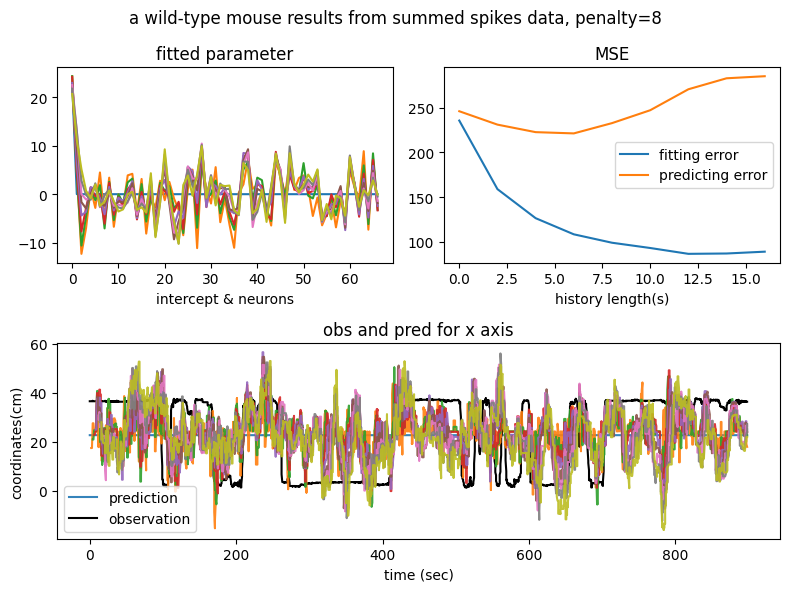

In [15]:
data_name=str(datalist[2]).split('/')[-1]
sample_type = "knockout" if "CaMKII" in data_name else "wild-type"

with open(output_dir/Path(f"rr_summed_spikes_{data_name}.pickle"),"rb") as f:
    results_all=pickle.load(f) 

plt.figure(figsize=(8,6))
fit_error=[]
pred_error=[]
nthist_list=[]
for result in results_all:
    if result["penalty"]==8 and result["coord_axis"]=="x-axis":
        fit_error.append((result["model_smry"]["fitted error"])/25) # the model result didnt divide the coordnates data by 5
        pred_error.append(cal_mse(result['model_smry']["prediction"],result["y_test"])/25)
        nthist_list.append(result["nthist"]/3)

        plt.subplot(221)
        plt.plot(result["model_smry"]["fitted parameter"]/5)
        plt.xlabel("intercept & neurons")
        plt.title("fitted parameter")

        test_length=len(result["y_test"])
        xx=[int(i/3) for i in range(result["nthist"],result["nthist"]+test_length)]
        if result["nthist"]==0:
            plt.subplot(212)
            plt.plot(xx,result["y_test"]/5,c="black",label="observation") # 200->40
            plt.legend()
            plt.title("obs and pred for x axis")
            plt.xlabel("time (sec)")
            plt.ylabel("coordinates(cm)")
        plt.subplot(212)
        plt.plot(xx,result['model_smry']["prediction"]/5,alpha=.9,label="prediction")

plt.subplot(222)
plt.plot(nthist_list,fit_error,label="fitting error")
plt.plot(nthist_list,pred_error,label="predicting error")
plt.title("MSE")
plt.xlabel("history length(s)")
plt.legend()

plt.suptitle(f"a {sample_type} mouse results from summed spikes data, penalty=8")
plt.tight_layout()

## Visualization for all mice

### x-axis predicting and fitting error

100%|██████████| 12/12 [00:00<00:00, 22.36it/s]


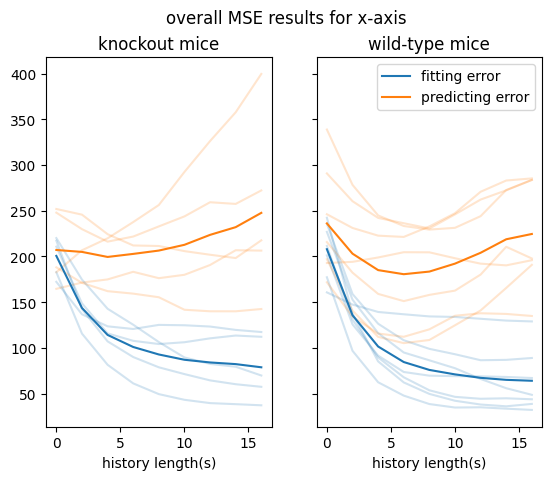

In [12]:
from matplotlib.lines import Line2D
fig,axes = plt.subplots(ncols=2,sharey=True)

fit_error_all_ko,fit_error_all_wt=[],[]
pred_error_all_ko,pred_error_all_wt=[],[]
nthist_list_all_ko,nthist_list_all_wt=[],[]
for data_dir in tqdm(datalist):
    data_name=str(data_dir).split('/')[-1]
    with open(output_dir/Path(f"rr_summed_spikes_{data_name}.pickle"),"rb") as f:
        results_all=pickle.load(f) 

    fit_error=[]
    pred_error=[]
    nthist_list=[]
    for result in results_all:
        if result["penalty"]==8 and result["coord_axis"]=="x-axis":
            fit_error.append((result["model_smry"]["fitted error"])/25) # the model result didnt divide the coordnates data by 5
            pred_error.append(cal_mse(result['model_smry']["prediction"],result["y_test"])/25)
            nthist_list.append(int(result["nthist"]/3))


    if "CaMKII" in data_name:
        fit_error_all_ko.append(fit_error)
        pred_error_all_ko.append(pred_error)
        nthist_list_all_ko.append(nthist_list)
        axes[0].plot(nthist_list,fit_error,c="#1f77b4",alpha=.2)
        axes[0].plot(nthist_list,pred_error,c="#ff7f0e",alpha=.2)
        axes[0].set_title("knockout mice")
        axes[0].set_xlabel("history length(s)")
    else:
        fit_error_all_wt.append(fit_error)
        pred_error_all_wt.append(pred_error)
        nthist_list_all_wt.append(nthist_list)
        axes[1].plot(nthist_list,fit_error,c="#1f77b4",alpha=.2)
        axes[1].plot(nthist_list,pred_error,c="#ff7f0e",alpha=.2)
        axes[1].set_title("wild-type mice")
        axes[1].set_xlabel("history length(s)")

# average MSE 
axes[0].plot(nthist_list,np.average(fit_error_all_ko,axis=0),c="#1f77b4")
axes[0].plot(nthist_list,np.average(pred_error_all_ko,axis=0),c="#ff7f0e")
axes[1].plot(nthist_list,np.average(fit_error_all_wt,axis=0),c="#1f77b4")
axes[1].plot(nthist_list,np.average(pred_error_all_wt,axis=0),c="#ff7f0e")

plt.suptitle("overall MSE results for x-axis")
custom_lines = [Line2D([0], [0], c="#1f77b4"),
                Line2D([0], [0], c="#ff7f0e")]
plt.legend(custom_lines, ["fitting error","predicting error"])

### y-axis predicting and fitting error

100%|██████████| 12/12 [00:00<00:00, 26.62it/s]


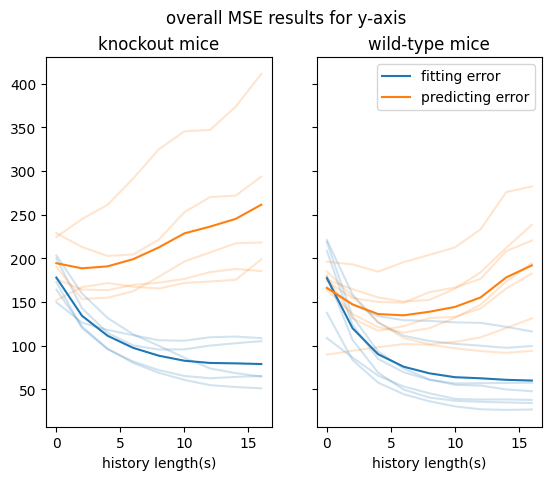

In [13]:
from matplotlib.lines import Line2D
fig,axes = plt.subplots(ncols=2,sharey=True)

fit_error_all_ko,fit_error_all_wt=[],[]
pred_error_all_ko,pred_error_all_wt=[],[]
nthist_list_all_ko,nthist_list_all_wt=[],[]
for data_dir in tqdm(datalist):
    data_name=str(data_dir).split('/')[-1]
    with open(output_dir/Path(f"rr_summed_spikes_{data_name}.pickle"),"rb") as f:
        results_all=pickle.load(f) 

    fit_error=[]
    pred_error=[]
    nthist_list=[]
    for result in results_all:
        if result["penalty"]==8 and result["coord_axis"]=="y-axis":
            fit_error.append((result["model_smry"]["fitted error"])/25) # the model result didnt divide the coordnates data by 5
            pred_error.append(cal_mse(result['model_smry']["prediction"],result["y_test"])/25)
            nthist_list.append(int(result["nthist"]/3))


    if "CaMKII" in data_name:
        fit_error_all_ko.append(fit_error)
        pred_error_all_ko.append(pred_error)
        nthist_list_all_ko.append(nthist_list)
        axes[0].plot(nthist_list,fit_error,c="#1f77b4",alpha=.2)
        axes[0].plot(nthist_list,pred_error,c="#ff7f0e",alpha=.2)
        axes[0].set_title("knockout mice")
        axes[0].set_xlabel("history length(s)")
    else:
        fit_error_all_wt.append(fit_error)
        pred_error_all_wt.append(pred_error)
        nthist_list_all_wt.append(nthist_list)
        axes[1].plot(nthist_list,fit_error,c="#1f77b4",alpha=.2)
        axes[1].plot(nthist_list,pred_error,c="#ff7f0e",alpha=.2)
        axes[1].set_title("wild-type mice")
        axes[1].set_xlabel("history length(s)")

# average MSE 
axes[0].plot(nthist_list,np.average(fit_error_all_ko,axis=0),c="#1f77b4")
axes[0].plot(nthist_list,np.average(pred_error_all_ko,axis=0),c="#ff7f0e")
axes[1].plot(nthist_list,np.average(fit_error_all_wt,axis=0),c="#1f77b4")
axes[1].plot(nthist_list,np.average(pred_error_all_wt,axis=0),c="#ff7f0e")

plt.suptitle("overall MSE results for y-axis")
custom_lines = [Line2D([0], [0], c="#1f77b4"),
                Line2D([0], [0], c="#ff7f0e")]
plt.legend(custom_lines, ["fitting error","predicting error"])